# Stress tensor rotation

This notebook computes the stress tensor after one/several rotations around the axes of the coordinate system

**How to use:**
1. Run the cell below to define the function.
2. Modify `sigma` and `Rx(10.0) @ Rz(30.0) @ Ry(45.0)` as needed and run the execution cells to see the results.


In [22]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)

In [11]:
# --- Initial stress tensor in principal coordinates (MPa) ---
sigma = np.diag([500.0, 0.0, 0.0])

print("User-defined stress tensor (MPa):\n", sigma)

User-defined stress tensor (MPa):
 [[500.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]]


In [12]:
# Rotation matrixes (definitions)

def Rx(deg):
    a = np.deg2rad(deg)
    return np.array([
        [1.0,       0.0,        0.0],
        [0.0,  np.cos(a),  np.sin(a)],
        [0.0, -np.sin(a),  np.cos(a)]
    ])

def Ry(deg):
    a = np.deg2rad(deg)
    return np.array([
        [ np.cos(a), 0.0, -np.sin(a)],
        [ 0.0,       1.0,  0.0      ],
        [ np.sin(a), 0.0,  np.cos(a)]
    ])

def Rz(deg):
    a = np.deg2rad(deg)
    return np.array([
        [ np.cos(a),  np.sin(a), 0.0],
        [-np.sin(a),  np.cos(a), 0.0],
        [ 0.0,        0.0,       1.0]
    ])

In [19]:
# --- Combined rotation of coordinate system ---
# Order: rotate around y by 45°, then z by 30°, then x by 10°
Q = Rx(10.0) @ Rz(30.0) @ Ry(45.0) # multiplication of rotation matrixes in inverse order

print("Global rotation matrix Q:\n", Q)

Global rotation matrix Q:
 [[ 0.612  0.5   -0.612]
 [-0.225  0.853  0.471]
 [ 0.758 -0.15   0.635]]


In [20]:
# --- Transform stress tensor to new coordinate system ---
sigma_new = Q @ sigma @ Q.T

print("\nTransformed stress tensor σ' (MPa):\n", sigma_new)


Transformed stress tensor σ' (MPa):
 [[187.5   -69.013 232.015]
 [-69.013  25.401 -85.397]
 [232.015 -85.397 287.099]]


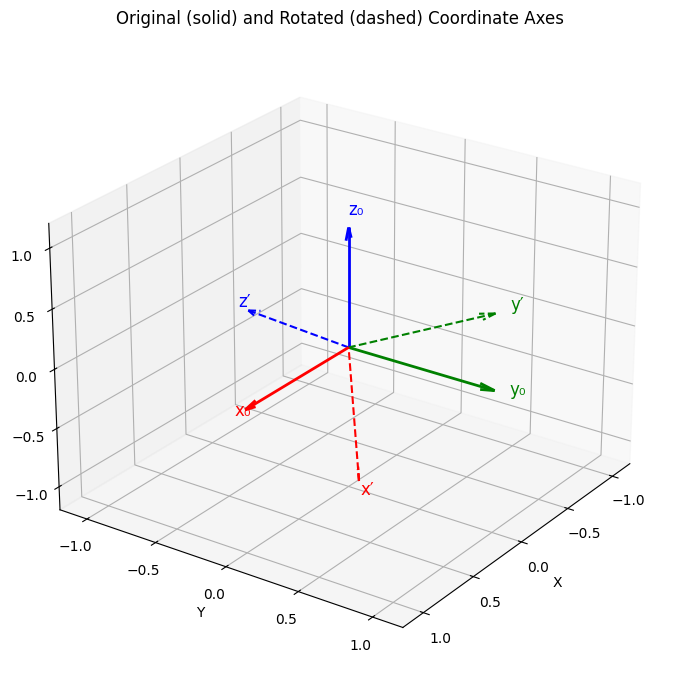

In [23]:
# --- Plot original and rotated coordinate axes ---
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Origin
origin = np.zeros((3, 1))

# Original coordinate axes (unit vectors)
axes_orig = np.eye(3)

# Rotated coordinate axes (columns of Q^T for passive rotation)
axes_rot = Q.T  # Each column is a rotated axis in the original system

# Define colors and labels
colors = ['r', 'g', 'b']
labels = ['x', 'y', 'z']

# Plot original axes
for i in range(3):
    ax.quiver(*origin.flatten(), *axes_orig[:, i], color=colors[i], length=1, arrow_length_ratio=0.1, linewidth=2)
    ax.text(*(1.1*axes_orig[:, i]), f'{labels[i]}₀', color=colors[i], fontsize=12)

# Plot rotated axes
for i in range(3):
    ax.quiver(*origin.flatten(), *axes_rot[:, i], color=colors[i], linestyle='dashed', length=1, arrow_length_ratio=0.1)
    ax.text(*(1.1*axes_rot[:, i]), f'{labels[i]}′', color=colors[i], fontsize=12)

# Formatting
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
ax.set_zlim([-1.2, 1.2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Original (solid) and Rotated (dashed) Coordinate Axes")

ax.view_init(elev=25, azim=35)
ax.grid(True)
plt.tight_layout()
plt.show()